In [3]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

import matplotlib.pyplot as plt

In [ ]:

df = pd.read_csv('nilai-gizi.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        1651 non-null   object 
 1   manufacturer                1651 non-null   object 
 2   serving_size                1651 non-null   object 
 3   energy_kcal                 1651 non-null   float64
 4   protein_g                   1651 non-null   float64
 5   carbohydrate_g              1651 non-null   float64
 6   fat_g                       1651 non-null   float64
 7   sugar_g                     1651 non-null   float64
 8   sodium_mg                   1651 non-null   float64
 9   fiber_g                     1651 non-null   float64
 10  energy_percentage_dv        1651 non-null   float64
 11  protein_percentage_dv       1651 non-null   float64
 12  carbohydrate_percentage_dv  1651 non-null   float64
 13  fat_percentage_dv           1651 

In [5]:
# Target yang mau diprediksi
target = "energy_kcal"

# Kolom nutrisi yang dipakai untuk memprediksi kalori
features = ["protein_g", "carbohydrate_g", "fat_g", "sugar_g", "fiber_g", "sodium_mg"]

# Cek apakah kolomnya ada
print("Kolom yang dipakai:", features, "-> target:", target)


Kolom yang dipakai: ['protein_g', 'carbohydrate_g', 'fat_g', 'sugar_g', 'fiber_g', 'sodium_mg'] -> target: energy_kcal


In [6]:
df.isnull().values.any()
df.isnull().sum()

# Buang baris yang ada nilai kosong (NaN) di fitur/target
# data = data.dropna(subset=features + [target])

# print("Jumlah data setelah dibersihkan:", data.shape)
# data[features + [target]].head()


name                          0
manufacturer                  0
serving_size                  0
energy_kcal                   0
protein_g                     0
carbohydrate_g                0
fat_g                         0
sugar_g                       0
sodium_mg                     0
fiber_g                       0
energy_percentage_dv          0
protein_percentage_dv         0
carbohydrate_percentage_dv    0
fat_percentage_dv             0
sodium_percentage_dv          0
Lemak jenuh                   0
Natrium                       0
Protein                       0
Karbohidrat total             0
Energi                        0
Lemak total                   0
Serat pangan                  0
dtype: int64

In [10]:
X = df[features]   # input
y = df[target]     # output (kalori)

# 80% data training, 20% data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nBENTUK DARI X_TRAIN : {X_train.shape}")
print(f"BENTUK DARI X_TEST: {X_test.shape}")
print(f"BENTUK DARI Y_TRAIN : {y_train.shape}")
print(f"BENTUK DARI Y_TEST: {y_test.shape}")


BENTUK DARI X_TRAIN : (1320, 6)
BENTUK DARI X_TEST: (331, 6)
BENTUK DARI Y_TRAIN : (1320,)
BENTUK DARI Y_TEST: (331,)


In [11]:
# Random Forest bagus untuk data non-linear dan biasanya akurasinya tinggi
model = LinearRegression()

model.fit(X_train, y_train)
print("Model selesai dilatih")
y_pred = model.predict(X_test)


Model selesai dilatih


In [15]:

mse = mean_squared_error(y_test, y_pred)  # rata-rata selisih prediksi
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)             # semakin dekat 1 semakin bagus
mape = mean_absolute_percentage_error(y_test, y_pred)

print("MSE  :", mse)
print("RMSE  :", rmse)
print("R^2  :", r2)
print("MAPE  :", mape)


MSE  : 1656.1229796062316
RMSE  : 40.695490900175066
R^2  : 0.9472671159659274
MAPE  : 4051925207352281.5


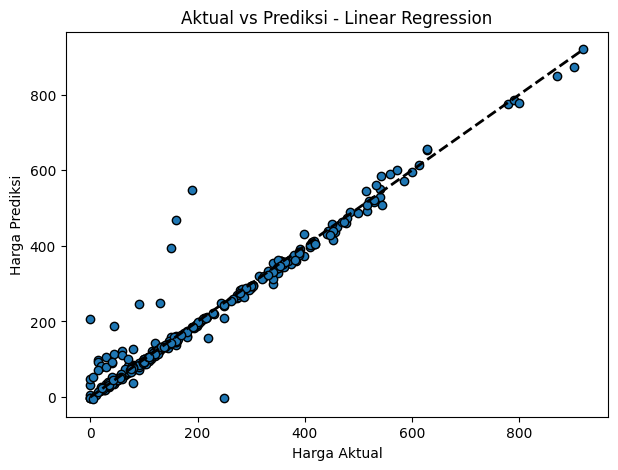

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, edgecolors=(0,0,0))
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],'k--', lw=2)
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.title("Aktual vs Prediksi - Linear Regression")
plt.show()